<a href="https://colab.research.google.com/github/RazerRaymond/MachineLearningPS/blob/main/KMeans%2B%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
n_center = 6
x_train, labels = make_blobs(n_samples=100, centers=n_center, random_state=5042024)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

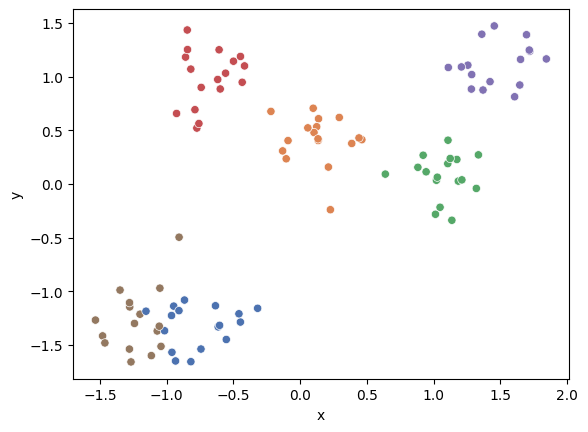

In [33]:
sns.scatterplot(x=[X[0] for X in x_train],
                y=[X[1] for X in x_train],
                hue=labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [48]:
def l2_dist(x, y_arr):
  return np.sqrt(np.sum((x - y_arr)**2))

In [88]:
class KMeans:
    def __init__(self, n_clusters=8, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit(self, x_train):
        # Initialize centroids randomly within the range of the dataset
        min_, max_ = np.min(x_train, axis=0), np.max(x_train, axis=0)
        # self.centroids = np.random.uniform(low=min_, high=max_, size=(self.n_clusters, x_train.shape[1]))
        ''' NEW INITIALIZE OF CENTS'''
        self.centroids = [x_train[np.random.choice(x_train.shape[0], size=1, replace=False)]]
        print(self.centroids)
        print('-----------First Cent picked above----------------')
        for _ in range(self.n_clusters-1):
            dists = np.array([min([np.linalg.norm(x - centroid)**2 for centroid in self.centroids]) for x in x_train])
            print(dists)
            probabilities = dists / np.sum(dists)
            new_centroid = x_train[np.random.choice(len(x_train), p=probabilities)]
            print(new_centroid)
            print('-----------New Cent picked above----------------')
            self.centroids.append(new_centroid)
        print('---------------Finished Centroids Picking------------------')
        print(len(self.centroids))
        self.centroids = np.vstack(self.centroids)
        self.initial_cent = np.copy(self.centroids)
        print(self.centroids.shape)
        print('P')
        for _ in range(self.max_iter):
            # Create lists to store points belonging to each centroid
            cent_l = [[] for _ in range(self.n_clusters)]
            for x in x_train:
                dists = np.array([l2_dist(x, cent) for cent in self.centroids])
                belong_id = np.argmin(dists)
                cent_l[belong_id].append(x)

            new_centroids = np.array([np.mean(points, axis=0) if points else cent for points, cent in zip(cent_l, self.centroids)])
            if np.allclose(self.centroids, new_centroids, rtol=1e-3):
                break
            self.centroids = new_centroids

    def evaluate(self, data):
        belong_cent = []
        belong_cent_ids = []
        for i in data:
            dist = np.array([l2_dist(i, cent) for cent in self.centroids])
            cent_id = np.argmin(dist)
            belong_cent.append(self.centroids[cent_id])
            belong_cent_ids.append(cent_id)
        return belong_cent, belong_cent_ids


In [89]:
km = KMeans(n_clusters=n_center)
km.fit(x_train)

[array([[-1.11490311, -1.59877077]])]
-----------First Cent picked above----------------
[7.22492510e+00 3.37946715e-01 1.29372244e+01 7.89369130e+00
 1.26753432e-02 6.53015588e+00 4.27534477e-01 1.19086103e+01
 2.84772835e-01 1.56040934e-01 7.62805411e+00 4.38000101e+00
 5.42936080e-01 9.26580844e+00 1.26090827e+01 1.52596003e+01
 1.60742168e+01 4.60102356e+00 6.77579215e+00 8.12904554e+00
 1.62337084e-01 6.94150104e+00 7.20446918e+00 1.72678510e-01
 7.22662989e+00 8.35143803e+00 5.45599670e-02 6.43090073e+00
 8.28238876e-01 7.92895263e+00 1.66980286e-01 2.31887501e-01
 2.40477046e-01 5.92925928e+00 8.20576409e+00 7.16696985e+00
 9.49851637e+00 1.22902198e+01 3.64505781e+00 1.60248768e+01
 6.43502797e+00 7.79230702e+00 3.22506868e-01 9.09131993e-02
 6.07732363e+00 3.53704657e-02 1.32173767e+01 5.11985984e+00
 4.46339511e-01 1.25908829e+00 5.80124955e+00 3.98806607e-01
 7.34937515e+00 8.09065131e+00 6.34868559e-02 1.39683256e+01
 6.52910065e+00 6.15708442e+00 1.61132919e+01 4.84256500e

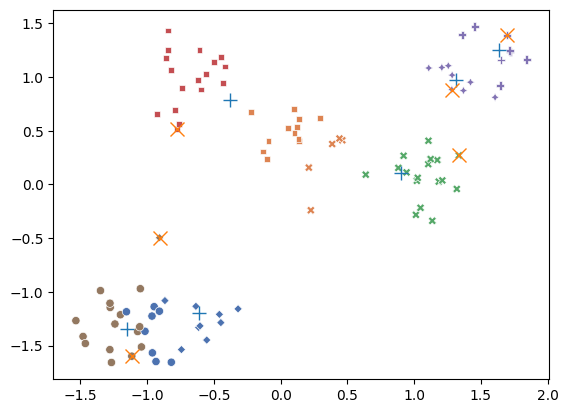

In [91]:
class_centers, classification = km.evaluate(x_train)
sns.scatterplot(x=[X[0] for X in x_train],
                y=[X[1] for X in x_train],
                hue=labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in km.centroids],
         [y for _, y in km.centroids],
         '+',
         markersize=10,
         )
plt.plot([x for x, _ in km.initial_cent],
         [y for _, y in km.initial_cent],
         'x',
         markersize=10,
         )
plt.show()